<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/2_transfer_learning_roadmap/3_effect_of_number_of_classes_in_dataset/1)%20Understand%20transfer%20learning%20and%20the%20role%20of%20number%20of%20dataset%20classes%20in%20it%20-%20Mxnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals

### 1. Visualize deep learning network


### 2. Understand how the final layer would change when number of classes in dataset changes

# What do you do with a deep learning model in transfer learning

    - These are the steps already done by contributors in pytorch, keras and mxnet
        - You take a deep learning architecture, such as resnet, densenet, or even custom network
        - Train the architecture on large datasets such as imagenet, coco, etc
        - The trained wieghts become your starting point for transfer learning
    
    
    - The final layer of this pretrained model has number of neurons = number of classes in the large dataset
    
    
    - In transfer learning
        - You take the network and load the pretrained weights on the network
        - Then remove the final layer that has the extra(or less) number of neurons
        - You add a new layer with number of neurons = number of classes in your custom dataset
        - Optionally you can add more layers in between this newly added final layer and the old network
    
    
    - Now you have two parts in your network
        - One that already existed, the pretrained one, the base network
        - The new sub-network or a single layer you added
        
    
    - The hyper-parameter we can see here: Freeze base network
        - Freezing base network makes the base network untrainable
        - The base network now acts as a feature extractor and only the next half is trained
        - If you do not freeze the base network the entire network is trained
        (You will take this part in next sessions)
     
     

# Table of Contents


## [Install](#0)


## [Setup Default Params with Cats-Dogs dataset](#1)


## [Visualize network](#2)


## [Reset Default Params with new dataset - Logo classification](#3)


## [Visualize the new network](#4)

<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon bakcned: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

## Dataset - Sample 
    - one having 2 classes
    - other having 16 classes

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jE-ckk0JbrdbJvIBaKMJWkTfbRDR2MaF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1jE-ckk0JbrdbJvIBaKMJWkTfbRDR2MaF" -O study_classes.zip && rm -rf /tmp/cookies.txt

In [3]:
! unzip -qq study_classes.zip

# Imports

In [1]:
#Using mxnet-gluon backend 

# When installed using pip
from monk.gluon_prototype import prototype


# When installed manually (Uncomment the following)
#import os
#import sys
#sys.path.append("monk_v1/");
#sys.path.append("monk_v1/monk/");
#from monk.gluon_prototype import prototype

### Creating and managing experiments
        - Provide project name
        - Provide experiment name

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "study-num-classes");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: study-num-classes
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/5_transfer_learning_params/1_number_of_classes_in_dataset/workspace/Project/study-num-classes/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |-----study-num-classes
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

<a id='1'></a>
# Setup Default Params with Cats-Dogs dataset

In [4]:
gtf.Default(dataset_path="study_classes/dogs_vs_cats", 
            model_name="resnet18_v1", 
            num_epochs=5);

Dataset Details
    Train path:     study_classes/dogs_vs_cats
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 35
    Num val images:   15
    Num classes:      2

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable layers:  41
        Num of actual trai

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


### From Data summary  - Num classes:      2

<a id='2'></a>
# Visualize network

In [6]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8081);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8081


## The final layer

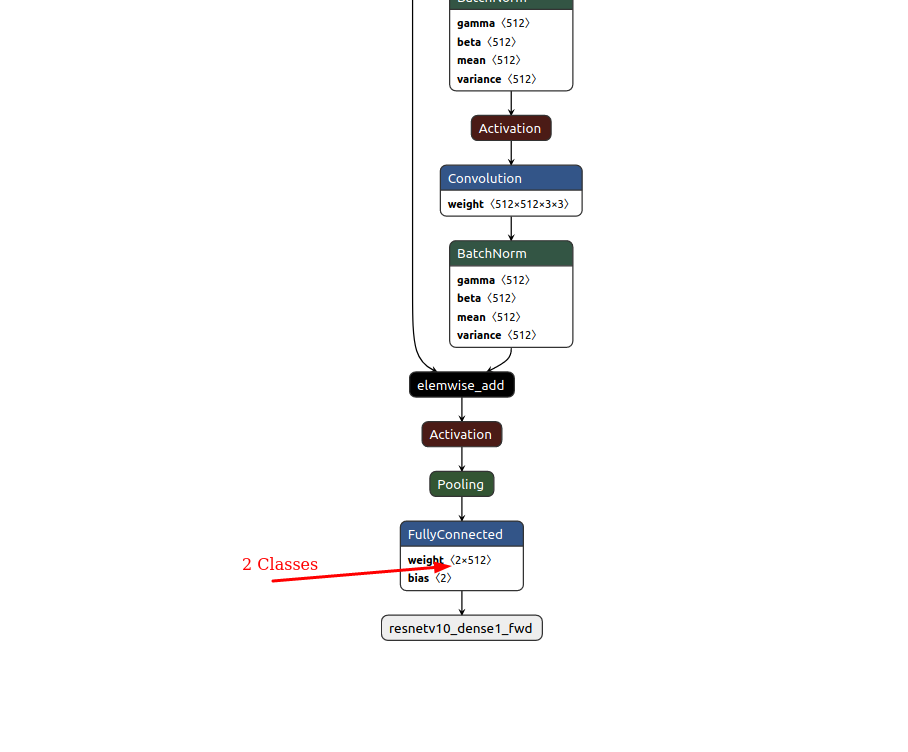

In [7]:
from IPython.display import Image
Image(filename='imgs/2_classes_base_gluon.png')

<a id='3'></a>
# Reset Default Params with new dataset - Logo classification

In [5]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "study-num-classes");

Mxnet Version: 1.5.0

Experiment Details
    Project: Project
    Experiment: study-num-classes
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/5_transfer_learning_params/1_number_of_classes_in_dataset/workspace/Project/study-num-classes/



In [6]:
gtf.Default(dataset_path="study_classes/logos", 
            model_name="resnet18_v1", 
            num_epochs=5);

Dataset Details
    Train path:     study_classes/logos
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 77
    Num val images:   33
    Num classes:      16

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable layers:  41
        Num of actual trainable 

monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:193: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


### From Data summary  - Num classes:      16

<a id='4'></a>
# Visualize network

In [10]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8082);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model-symbol.json' at http://localhost:8082


## The final layer

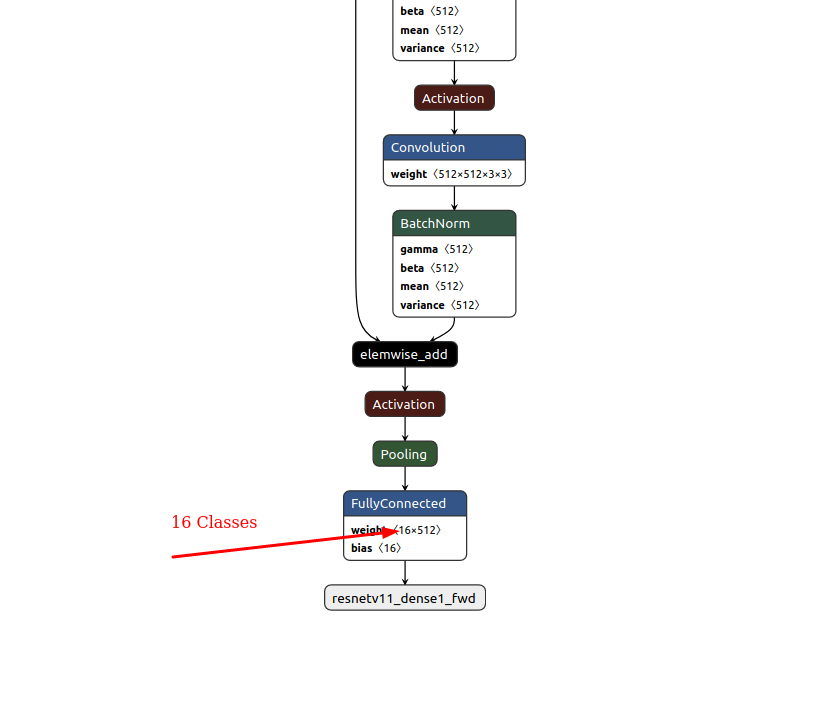

In [11]:
from IPython.display import Image
Image(filename='imgs/16_classes_base_gluon.png')

# Goals Completed

### 1. Visualize deep learning network

### 2. Understand how the final layer would change when number of classes in dataset changes